# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
lat = pd.cut(sinasc_raw['munResLat'], [-50, -10.5, 50])
lat.value_counts(dropna=False)

munResLat
(-10.5, 50.0]     14034
(-50.0, -10.5]    12993
NaN                   1
Name: count, dtype: int64

In [4]:
partos = sinasc_raw.pivot_table(values=['QTDPARTNOR', 'QTDPARTCES'],
                                          index=['GESTACAO', lat],
                                          aggfunc={'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 
                                                   'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
partos

QTDPARTCES                                  \
                                          max      mean median  min       std   
GESTACAO            munResLat                                                   
22 a 27 semanas     (-50.0, -10.5]        1.0  0.303030    0.0  0.0  0.466694   
                    (-10.5, 50.0]         1.0  0.104167    0.0  0.0  0.308709   
28 a 31 semanas     (-50.0, -10.5]        2.0  0.563380    0.0  0.0  0.787988   
                    (-10.5, 50.0]         3.0  0.394737    0.0  0.0  0.694338   
32 a 36 semanas     (-50.0, -10.5]        5.0  0.552381    0.0  0.0  0.771031   
                    (-10.5, 50.0]         4.0  0.493988    0.0  0.0  0.743723   
37 a 41 semanas     (-50.0, -10.5]       10.0  0.554250    0.0  0.0  0.740960   
                    (-10.5, 50.0]        12.0  0.488585    0.0  0.0  0.741418   
42 semanas e mais   (-50.0, -10.5]        4.0  0.442308    0.0  0.0  0.705598   
                    (-10.5, 50.0]         2.0  0.316872    0.0  0.0  0.562612   
Menos de 22 semanas (-50.0, -10.5]        2.0  0.500000    0.0  0.0  0.836660   
                    (-10.5, 50.0]         0.0  0.000000    0.0  0.0       NaN   

                                                     QTDPARTNOR            \
                                       sum       var        max      mean   
GESTACAO            munResLat                                               
22 a 27 semanas     (-50.0, -10.5]    10.0  0.217803        4.0  0.606061   
                    (-10.5, 50.0]      5.0  0.095301        6.0  0.836735   
28 a 31 semanas     (-50.0, -10.5]    40.0  0.620926        4.0  0.400000   
                    (-10.5, 50.0]     30.0  0.482105        6.0  0.631579   
32 a 36 semanas     (-50.0, -10.5]   580.0  0.594489       10.0  0.593123   
                    (-10.5, 50.0]    493.0  0.553123       12.0  0.809428   
37 a 41 semanas     (-50.0, -10.5]  5992.0  0.549022       41.0  0.422860   
                    (-10.5, 50.0]   5072.0  0.549701       40.0  0.701647   
42 semanas e mais   (-50.0, -10.5]   184.0  0.497868        9.0  0.614458   
                    (-10.5, 50.0]     77.0  0.316532        5.0  0.892116   
Menos de 22 semanas (-50.0, -10.5]     3.0  0.700000        2.0  0.500000   
                    (-10.5, 50.0]      0.0       NaN        0.0  0.000000   

                                                                            
                                   median  min       std     sum       var  
GESTACAO            munResLat                                               
22 a 27 semanas     (-50.0, -10.5]    0.0  0.0  0.966288    20.0  0.933712  
                    (-10.5, 50.0]     0.0  0.0  1.374575    41.0  1.889456  
28 a 31 semanas     (-50.0, -10.5]    0.0  0.0  0.840979    28.0  0.707246  
                    (-10.5, 50.0]     0.0  0.0  1.141252    48.0  1.302456  
32 a 36 semanas     (-50.0, -10.5]    0.0  0.0  1.200171   621.0  1.440412  
                    (-10.5, 50.0]     0.0  0.0  1.293244   807.0  1.672481  
37 a 41 semanas     (-50.0, -10.5]    0.0  0.0  1.107970  4569.0  1.227597  
                    (-10.5, 50.0]     0.0  0.0  1.274831  7241.0  1.625194  
42 semanas e mais   (-50.0, -10.5]    0.0  0.0  1.159203   255.0  1.343752  
                    (-10.5, 50.0]     0.0  0.0  1.273439   215.0  1.621646  
Menos de 22 semanas (-50.0, -10.5]    0.0  0.0  0.836660     3.0  0.700000  
                    (-10.5, 50.0]     0.0  0.0       NaN     0.0       NaN

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
print('Min:',sinasc_raw['munResArea'].min()) 
print('Max:',sinasc_raw['munResArea'].max())

Min: 459.978
Max: 34096.394


In [6]:
faixa_area = pd.cut(sinasc_raw['munResArea'], [-2500, 3000, 3500])

qtd_fil_vivo_morto = sinasc_raw.pivot_table(values=['QTDFILVIVO', 'QTDFILMORT'],
                                          index=['GESTACAO', faixa_area],
                                          aggfunc={'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'QTDFILMORT': 
['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
qtd_fil_vivo_morto

QTDFILMORT                                  \
                                         max      mean median  min       std   
GESTACAO            munResArea                                                 
22 a 27 semanas     (-2500, 3000]        1.0  0.307692    0.0  0.0  0.480384   
                    (3000, 3500]         NaN       NaN    NaN  NaN       NaN   
28 a 31 semanas     (-2500, 3000]        2.0  0.250000    0.0  0.0  0.531610   
                    (3000, 3500]         1.0  0.250000    0.0  0.0  0.500000   
32 a 36 semanas     (-2500, 3000]        4.0  0.314943    0.0  0.0  0.647314   
                    (3000, 3500]         3.0  0.492063    0.0  0.0  0.715565   
37 a 41 semanas     (-2500, 3000]        4.0  0.237136    0.0  0.0  0.539062   
                    (3000, 3500]         6.0  0.318885    0.0  0.0  0.617961   
42 semanas e mais   (-2500, 3000]        3.0  0.277778    0.0  0.0  0.560555   
                    (3000, 3500]         2.0  0.428571    0.0  0.0  0.597614   
Menos de 22 semanas (-2500, 3000]        0.0  0.000000    0.0  0.0  0.000000   
                    (3000, 3500]         NaN       NaN    NaN  NaN       NaN   

                                                    QTDFILVIVO            \
                                      sum       var        max      mean   
GESTACAO            munResArea                                             
22 a 27 semanas     (-2500, 3000]     4.0  0.230769        2.0  0.923077   
                    (3000, 3500]      0.0       NaN        NaN       NaN   
28 a 31 semanas     (-2500, 3000]     6.0  0.282609        2.0  0.458333   
                    (3000, 3500]      1.0  0.250000        1.0  1.000000   
32 a 36 semanas     (-2500, 3000]   137.0  0.419016        6.0  0.988584   
                    (3000, 3500]     31.0  0.512033        4.0  1.256410   
37 a 41 semanas     (-2500, 3000]  1060.0  0.290587       30.0  0.916815   
                    (3000, 3500]    206.0  0.381875       10.0  1.132841   
42 semanas e mais   (-2500, 3000]    35.0  0.314222        5.0  0.849206   
                    (3000, 3500]      9.0  0.357143        4.0  1.393939   
Menos de 22 semanas (-2500, 3000]     0.0  0.000000        3.0  1.500000   
                    (3000, 3500]      0.0       NaN        NaN       NaN   

                                                                           
                                  median  min       std     sum       var  
GESTACAO            munResArea                                             
22 a 27 semanas     (-2500, 3000]    1.0  0.0  0.759555    12.0  0.576923  
                    (3000, 3500]     NaN  NaN       NaN     0.0       NaN  
28 a 31 semanas     (-2500, 3000]    0.0  0.0  0.779028    11.0  0.606884  
                    (3000, 3500]     1.0  1.0  0.000000     4.0  0.000000  
32 a 36 semanas     (-2500, 3000]    1.0  0.0  1.053427   433.0  1.109709  
                    (3000, 3500]     1.0  0.0  0.999167    98.0  0.998335  
37 a 41 semanas     (-2500, 3000]    1.0  0.0  1.071811  4111.0  1.148778  
                    (3000, 3500]     1.0  0.0  1.057260   921.0  1.117799  
42 semanas e mais   (-2500, 3000]    0.0  0.0  1.088614   107.0  1.185079  
                    (3000, 3500]     1.0  0.0  1.058873    46.0  1.121212  
Menos de 22 semanas (-2500, 3000]    1.5  0.0  2.121320     3.0  4.500000  
                    (3000, 3500]     NaN  NaN       NaN     0.0       NaN

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [9]:
idade_mae = pd.cut(sinasc_raw['munResAlt'], 5)
sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
                       index=['ESCMAE', idade_mae],
                       aggfunc={
                                'PESO': ['mean', 'median'],
                                'IDADEPAI': [('maximo',np.max), ('minimo', np.min)]
                                   },
                                   dropna=True)

C:\Users\guife\AppData\Local\Temp\ipykernel_2164\2120607950.py:2: FutureWarning: The provided callable <function max at 0x0000027474835260> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
C:\Users\guife\AppData\Local\Temp\ipykernel_2164\2120607950.py:2: FutureWarning: The provided callable <function min at 0x00000274748353A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],


IDADEPAI                PESO        
                                 maximo minimo         mean  median
ESCMAE          munResAlt                                          
1 a 3 anos      (84.49, 187.0]     60.0   18.0  3164.506944  3227.5
                (187.0, 289.0]     55.0   21.0  3167.235294  3290.0
                (289.0, 391.0]     41.0   17.0  3286.166667  3295.0
                (391.0, 493.0]     38.0   23.0  3102.000000  3170.0
                (493.0, 595.0]      NaN    NaN  2846.900000  3050.0
12 anos ou mais (84.49, 187.0]     65.0   17.0  3260.066379  3285.0
                (187.0, 289.0]     60.0   18.0  3208.946331  3230.0
                (289.0, 391.0]     58.0   19.0  3237.820513  3292.0
                (391.0, 493.0]     44.0   21.0  3278.344086  3300.0
                (493.0, 595.0]     60.0   18.0  3207.607219  3270.0
4 a 7 anos      (84.49, 187.0]     73.0   16.0  3238.246524  3275.0
                (187.0, 289.0]     86.0   16.0  3173.756131  3232.5
                (289.0, 391.0]     47.0   18.0  3286.981308  3384.0
                (391.0, 493.0]     47.0   18.0  3212.245614  3195.0
                (493.0, 595.0]     23.0   23.0  3137.688525  3240.0
8 a 11 anos     (84.49, 187.0]     70.0   15.0  3256.105529  3275.0
                (187.0, 289.0]     69.0   16.0  3225.353300  3255.0
                (289.0, 391.0]     61.0   17.0  3244.339564  3260.0
                (391.0, 493.0]     53.0   16.0  3244.593301  3310.0
                (493.0, 595.0]     47.0   24.0  3256.625384  3280.0
Nenhuma         (84.49, 187.0]     52.0   29.0  3209.166667  3135.0
                (187.0, 289.0]     43.0   30.0  2577.428571  2905.0
                (289.0, 391.0]      NaN    NaN  2255.000000  2255.0
                (493.0, 595.0]      NaN    NaN  3425.000000  3425.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [11]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Governador Jorge Teixeira": "Jaru",
    "Jaru": "Jaru",
    "Machadinho d'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada d'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Alta Floresta d'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão d'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia d'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia d'Oeste": "Cacoal",
    "São Felipe d'Oeste": "Cacoal",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}
imediatas

{'Candeias do Jamari': 'Porto Velho',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Nova Mamoré': 'Porto Velho',
 'Porto Velho': 'Porto Velho',
 'Alto Paraíso': 'Ariquemes',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cacaulândia': 'Ariquemes',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Cujubim': 'Ariquemes',
 'Monte Negro': 'Ariquemes',
 'Rio Crespo': 'Ariquemes',
 'Governador Jorge Teixeira': 'Jaru',
 'Jaru': 'Jaru',
 "Machadinho d'Oeste": 'Jaru',
 'Theobroma': 'Jaru',
 'Vale do Anari': 'Jaru',
 "Alvorada d'Oeste": 'Ji-Paraná',
 'Costa Marques': 'Ji-Paraná',
 'Ji-Paraná': 'Ji-Paraná',
 'Mirante da Serra': 'Ji-Paraná',
 'Nova União': 'Ji-Paraná',
 'Ouro Preto do Oeste': 'Ji-Paraná',
 'Presidente Médici': 'Ji-Paraná',
 'São Francisco do Guaporé': 'Ji-Paraná',
 'São Miguel do Guaporé': 'Ji-Paraná',
 'Seringueiras': 'Ji-Paraná',
 'Teixeirópolis': 'Ji-Paraná',
 'Urupá': 'Ji-Paraná',
 'Vale do Paraíso': 'Ji-Paraná',
 "Alta Floresta d'Oeste": 'Cacoal',
 'Alt

<Axes: xlabel='imediatas', ylabel='idade_mãe'>

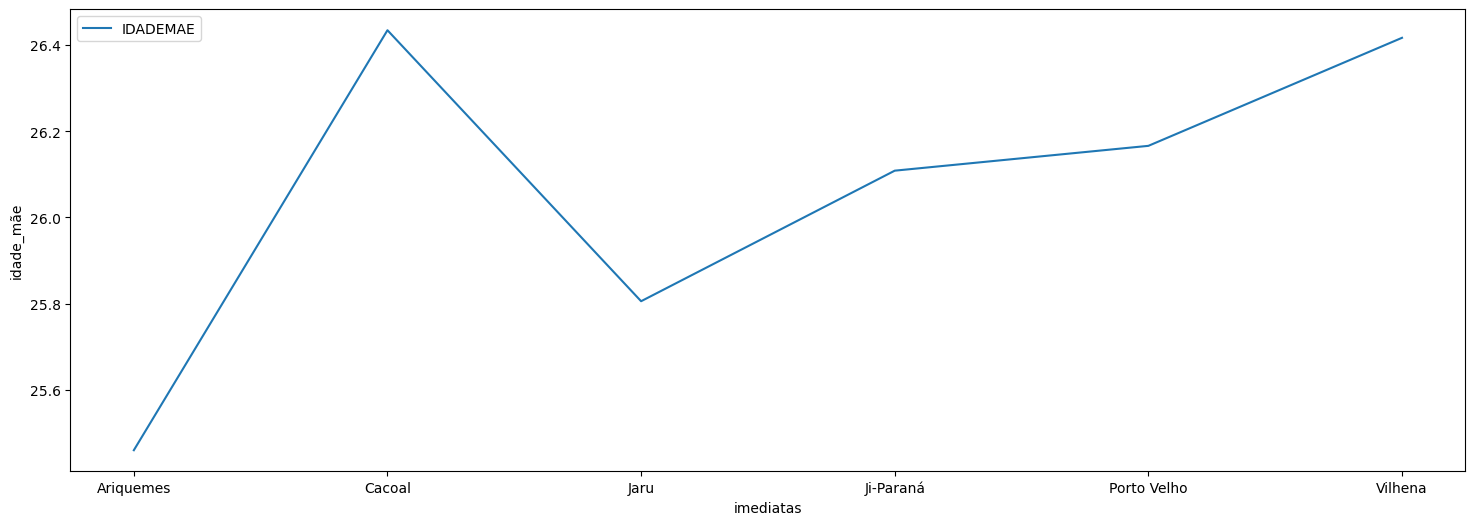

In [12]:
imediatas_idade_mae = sinasc_raw.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('idade_mãe')
plt.xlabel('imediatas')
imediatas_idade_mae

[Text(0, 0, "Alta Floresta D'Oeste"),
 Text(1, 0, 'Alto Alegre dos Parecis'),
 Text(2, 0, 'Novo Horizonte do Oeste'),
 Text(3, 0, 'Rolim de Moura'),
 Text(4, 0, "São Felipe D'Oeste"),
 Text(5, 0, 'Ariquemes'),
 Text(6, 0, 'Cujubim'),
 Text(7, 0, 'Alto Paraíso'),
 Text(8, 0, 'Monte Negro'),
 Text(9, 0, 'Jaru'),
 Text(10, 0, 'Rio Crespo'),
 Text(11, 0, 'Porto Velho'),
 Text(12, 0, 'Cacaulândia'),
 Text(13, 0, 'Itapuã do Oeste'),
 Text(14, 0, 'Ji-Paraná'),
 Text(15, 0, 'Buritis'),
 Text(16, 0, 'Vilhena'),
 Text(17, 0, 'Vale do Anari'),
 Text(18, 0, 'Candeias do Jamari'),
 Text(19, 0, 'Costa Marques'),
 Text(20, 0, 'Campo Novo de Rondônia'),
 Text(21, 0, "Machadinho D'Oeste"),
 Text(22, 0, 'Colorado do Oeste'),
 Text(23, 0, 'Nova Mamoré'),
 Text(24, 0, 'Urupá'),
 Text(25, 0, 'Ouro Preto do Oeste'),
 Text(26, 0, 'Corumbiara'),
 Text(27, 0, 'São Miguel do Guaporé'),
 Text(28, 0, 'Governador Jorge Teixeira'),
 Text(29, 0, "Santa Luzia D'Oeste"),
 Text(30, 0, 'Pimenta Bueno'),
 Text(31, 0, 'Mi

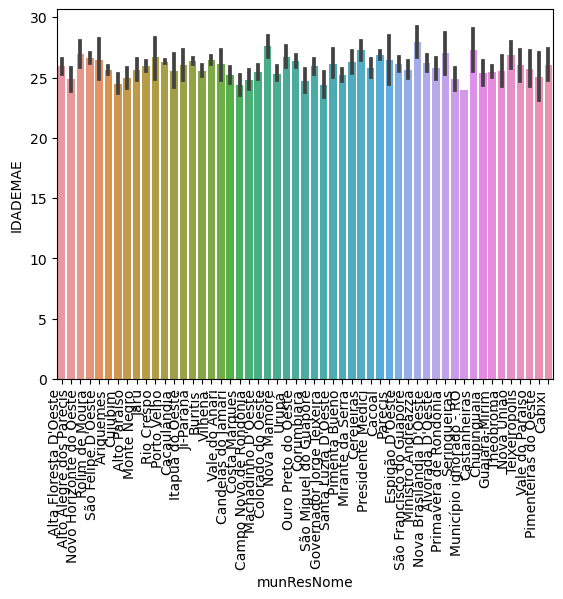

In [13]:
municipio = sns.barplot(x='munResNome', y='IDADEMAE', data=sinasc_raw)
municipio.set_xticklabels(municipio.get_xticklabels(), rotation=90, horizontalalignment='right')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [15]:
IDH = {
    "Alta Floresta D'Oeste" : 'IDH-médio', 
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio', 
    'Rolim de Moura': 'IDH-alto', 
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto', 
    'Cujubim': 'IDH-médio', 
    'Alto Paraíso': 'IDH-médio', 
    'Monte Negro': 'IDH-médio', 
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio', 
    'Porto Velho': 'IDH-alto', 
    'Cacaulândia': 'IDH-médio', 
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto', 
    'Buritis': 'IDH-médio', 
    'Vilhena':'IDH-alto', 
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio', 
    'Costa Marques':'IDH-médio', 
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo', 
    'Colorado do Oeste': 'IDH-médio', 
    'Nova Mamoré': 'IDH-baixo', 
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio', 
    'Corumbiara':'IDH-médio', 
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo', 
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto', 
    'Mirante da Serra':'IDH-médio', 
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio', 
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio', 
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio', 
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio', 
    'Seringueiras':'IDH-baixo',
    'Castanheiras':'IDH-médio', 
    'Chupinguaia':'IDH-médio', 
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo', 
    'Teixeirópolis':'IDH-médio', 
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'   
}

In [16]:
idh = sinasc_raw.set_index('munResNome')
idh.groupby(IDH)[['IDADEMAE', 'IDADEPAI']].agg(['mean','median', 'std'])

IDADEMAE                    IDADEPAI                 
                 mean median       std       mean median       std
munResNome                                                        
IDH-alto    26.280332   26.0  6.415374  31.074091   30.0  7.773149
IDH-baixo   25.326944   25.0  6.194908  30.617450   30.0  7.417345
IDH-médio   25.884855   25.0  6.353274  31.207092   30.0  7.824859

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [17]:
IFDM = {
    "Espigão d'Oeste":'des_regular',
    'Seringueiras':'des_regular',
    "Alvorada d'Oeste":'des_regular',
    'Itapuã do Oeste':'des_regular',
    'Cabixi':'des_regular',
    'Novo Horizonte do Oeste':'des_regular',
    "Nova Brasilândia d'Oeste":'des_regular',
    'Vale do Paraíso':'des_regular',
    'Corumbiara':'des_regular',
    'Alto Paraíso':'des_regular',
    'Cacaulândia':'des_regular',
    'Vale do Anari':'des_regular',
    'Ministro Andreazza':'des_regular',
    'Costa Marques':'des_regular',
    'Nova União':'des_regular',
    'Guajará-Mirim':'des_regular',
    'Mirante da Serra':'des_regular',
    'Parecis':'des_regular',
    'Castanheiras':'des_regular',
    'Theobroma':'des_regular',
    "Machadinho d'Oeste":'des_regular',
    'Campo Novo de Rondônia':'des_regular',
    'Nova Mamoré':'des_regular',
    'Cujubim':'des_regular',
    'Alto Alegre dos Parecis':'des_regular',
    'Governador Jorge Teixeira': 'des_regular',
    "Ariquemes": 'des_moderado',
    "Vilhena": 'des_moderado',
    "Pimenta Bueno": 'des_moderado',
    "Porto Velho": 'des_moderado',
    "Ji-Paraná": 'des_moderado',
    "Cacoal": 'des_moderado',
    "Santa Luzia d'Oeste": 'des_moderado',
    "Rolim de Moura": 'des_moderado',
    "Chupinguaia": 'des_moderado',
    "São Miguel do Guaporé": 'des_moderado',
    "Pimenteiras do Oeste": 'des_moderado',
    "Teixeirópolis": 'des_moderado',
    "Colorado do Oeste": 'des_moderado',
    "Jaru": 'des_moderado',
    "Rio Crespo": 'des_moderado',
    "Primavera de Rondônia": 'des_moderado',
    "Alta Floresta d'Oeste": 'des_moderado',
    "Ouro Preto do Oeste": 'des_moderado',
    "São Francisco do Guaporé": 'des_moderado',
    "Candeias do Jamari": 'des_moderado',
    "Buritis": 'des_moderado',
    "São Felipe d'Oeste": 'des_moderado',
    "Presidente Médici": 'des_moderado',
    "Cerejeiras": 'des_moderado',
    "Monte Negro": 'des_moderado',
    "Urupá": 'des_moderado',
    
}

In [18]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,561938,26.226921,12,53,26.0,6.388564,40.813756
des_regular,93135,25.412005,11,52,25.0,6.376854,40.664266


In [19]:
sinasc_raw.set_index('munResNome')['IDADEPAI'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,179957.0,31.145206,15.0,70.0,30.0,7.741017,59.923346
des_regular,25327.0,31.345297,16.0,73.0,30.0,7.975385,63.606768


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [20]:
PIB = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [21]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,465846,26.265562,12,47,26.0,6.403777,41.008357
Acima de 100 Milhões,47508,25.638424,12,52,25.0,6.324801,40.003102
Acima de 200 Milhões,13051,25.146435,13,41,25.0,5.905771,34.878129
Acima de 300 Milhões,32184,25.706070,11,47,25.0,6.344987,40.258860
Acima de 500 Milhões,86486,25.785927,13,53,25.0,6.479551,41.984580
Até 100 Milhões,9998,26.519894,14,41,26.0,5.877767,34.548140


In [22]:
sinasc_raw.set_index('munResNome')['IDADEPAI'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,144654.0,31.108387,15.0,70.0,30.0,7.767477,60.333700
Acima de 100 Milhões,18253.0,31.744348,17.0,73.0,31.0,8.008643,64.138361
Acima de 200 Milhões,5796.0,30.187500,16.0,55.0,29.0,7.659388,58.666230
Acima de 300 Milhões,8691.0,30.819149,16.0,64.0,30.0,7.858123,61.750095
Acima de 500 Milhões,20869.0,31.381955,17.0,60.0,31.0,7.583172,57.504493
Até 100 Milhões,7021.0,31.626126,17.0,67.0,30.0,7.665510,58.760038


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [25]:
As mães tem uma faixa de idade de 25/26 anos no primeiro filho, 
Os pais geralmente são mais velhos que as mães numa diferença de 5/6 anos de diferença,
As mulheres vivem mais que os homens.

SyntaxError: invalid syntax (1632591117.py, line 1)